# AMP2017 Analyses and Code
## Sharon Inkelas and Eric Wilbanks

This document (and associated python scripts) is a collection of analyses presented at the 2017 Annual Meeting on Phonology. At present, the analyses are not highly documented here, but are meaningful when compared to the tableaux and phenomenon in the conference slides. 

If you have questions about the analysis, please email Eric Wilbanks at wilbanks_eric (at) berkeley (dot) edu

# Toy Example Harmony Function

This harmony function corresponds to the effect of the linear scaled constraint in the toy example.

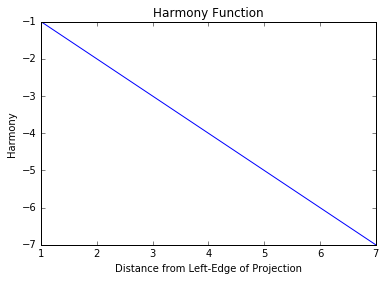

In [22]:
%matplotlib inline
import pylab
import numpy
#from scipy.optimize import fmin

## Define our harmony function and find its value at maximum harmony candidate x=1
def f(x): return -x

# Plot Full
x_arr = numpy.linspace(1,7,100)
y = f(x_arr)
pylab.plot(x_arr,y)
pylab.xlabel('Distance from Left-Edge of Projection')
pylab.ylabel('Harmony') 
pylab.title('Harmony Function')
pylab.savefig('toy_harm.png')
pylab.show()

# Japanese Mimetic Palatalization

Testing distance-based penalty scaling for Japanese palataliation. See slides for relevant tableaux. 

In [23]:
from japanese_mimetic3 import main as mim3

mim3_params, mim3 = mim3()

for n, harmony in enumerate(mim3):
    print('Candidate ' + str(n+1) + ': ' + str(harmony))
    
print(mim3_params)

Candidate 1: -5.00001133333
Candidate 2: -6.00001366667
Candidate 3: -2.000004
Candidate 4: -4.000008
Candidate 5: -6.00001233334
Candidate 6: -5.00001133333
Candidate 7: -5.00001133334
Candidate 8: -5.00001033334
{'b': 1.0000013333333329, 'z': 1.0000009999999868, 'a': 1.0000009999999979, 'y': 1.0000009999999917, 'x': 5.0000113333332923}


# Selkup Quantity-Sensitive Stress
Testing distance-based penalty scaling for Selkup stress assignment. See slides for relevant tableaux. 

In [24]:
from selkup_stress import main as sks

sks_params, sks = sks()

for n, harmony in enumerate(sks):
    print('Candidate ' + str(n+1) + ': ' + str(harmony))
    
print(sks_params)

Candidate 1: -2.0000065
Candidate 2: -1.000002
Candidate 3: -2.00000650001
Candidate 4: -1.000003
Candidate 5: -2.0000045
Candidate 6: -2.0000065
Candidate 7: -2.00000850002
Candidate 8: -2.00000750001
Candidate 9: -2.00000650001
Candidate 10: -2.0000055
{'b': 1.0000014999999813, 'z': 1.0000009999999957, 'a': 1.0000004999999825, 'y': 1.0000009999999973, 'x': 2.0000064999999445}


# Generating Final Default Stress in a 3-syllable final Window System

## Intro

In this demonstration, we will be modeling a system in which stress falls in a 3-syllable final window. If the underlying stress falls within this window, it is realized faithfully. Otherwise, the stress falls on the final syllable. 

Consider the system below: 

In [25]:
from ipy_table import *
inputs = [["","ssssssS","x (Faith)","y (Align-R)","dist-from-right"],[1,"ssssssS",0,-1,1],[2,"Sssssss",-1,-1,7],[3,"sssssSs",-1,-1,2],[4,"ssssSss",-1,-1,3],[5,"sssSsss",-1,-1,4],["","","","",""],["","sssSsss","x (Faith)","y (Align-R)","dist-from-right"],[6,"ssssssS",-1,-1,1],[7,"Sssssss",-1,-1,7],[8,"sssssSs",-1,-1,2],[9,"ssssSss",-1,-1,3],[10,"sssSsss",0,-1,4],["","","","",""],["","ssssSss","x (Faith)","y (Align-R)","dist-from-right"],[11,"ssssssS",-1,-1,1],[12,"Sssssss",-1,-1,7],[13,"sssssSs",-1,-1,2],[14,"ssssSss",0,-1,3],[15,"sssSsss",-1,-1,4]]
make_table(inputs)
set_row_style(0,color='grey')
set_row_style(7,color='grey')
set_row_style(14,color='grey')
set_cell_style(1,1,color='green')
set_cell_style(8,1,color='green')
set_cell_style(18,1,color='green')

,ssssssS,x (Faith),y (Align-R),dist-from-right
1,ssssssS,0,-1,1
2,Sssssss,-1,-1,7
3,sssssSs,-1,-1,2
4,ssssSss,-1,-1,3
5,sssSsss,-1,-1,4
,,,,
,sssSsss,x (Faith),y (Align-R),dist-from-right
6,ssssssS,-1,-1,1
7,Sssssss,-1,-1,7
8,sssssSs,-1,-1,2


## Scaling Function
This solution assumes that a candidate's harmony is calculated as follows:

`H = x * (violations of x) + y * (scaling_function) * violations of y)`

The shape of the scaling function is `f(n)= a^n` where `a` is a constant across the system and `n` (in this example) corresponds to the stressed syllable's distance from the right edge. 

## Solution

After solving for a system which satisfies our constraints (see `scalar_product_test4.py` and my sheet T4) we generate the harmony for each input's candidate. 

We can see that the winners for each input (Candidates 1, 6, and 14) are the highest (least negative) values for their input.

In [26]:
from scalar_product_test4 import main as test4

t4_params, t4 = test4()

for n, harmony in enumerate(t4):
    if n % 5 == 0:
        print()
        input = (n/5) + 1
        print("Input #" + str(input))
    print('Candidate ' + str(n+1) + ': ' + str(harmony))


Input #1.0
Candidate 1: -1.32471905183
Candidate 2: -8.15919070039
Candidate 3: -2.75487981142
Candidate 4: -3.32472007042
Candidate 5: -4.07959756316

Input #2.0
Candidate 6: -2.32472005183
Candidate 7: -8.15919070039
Candidate 8: -2.75487981142
Candidate 9: -3.32472007042
Candidate 10: -3.07959656316

Input #3.0
Candidate 11: -2.32472005183
Candidate 12: -8.15919070039
Candidate 13: -2.75487981142
Candidate 14: -2.32471907042
Candidate 15: -4.07959756316


## Coefficient Values

The difference between candidates 11 and 14 is extremely small since the solution we have was minimizing the weights of the constraints. The values for each parameter is shown below.

In [27]:
for p in t4_params.items():
    print(p)

('a', 1.3247177271169968)
('y', 1.0000009999999997)
('x', 1.0000009999999984)


We can observe that the difference between x and y is quite small. Our system only requires that the weight of Align-R be slightly larger than the weight of Faith. 

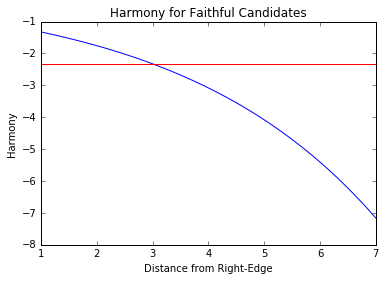

In [28]:
%matplotlib inline
import pylab
import numpy
#from scipy.optimize import fmin

## Define our harmony function and find its value at maximum harmony candidate x=1
def f(x): return -t4_params['y']*(t4_params['a']**x)
#max_x = fmin(lambda x: -f(x), 0)
max_x = 1
max_y = f(max_x)

# Find faith threshold
threshold = max_y - t4_params['x']

# Plot Full
x = numpy.linspace(1,7,100)
y = -t4_params['y']*(t4_params['a']**x)
pylab.plot(x,y)
pylab.axhline(threshold,color='red')
pylab.xlabel('Distance from Right-Edge')
pylab.ylabel('Harmony')
pylab.title('Harmony for Faithful Candidates')
pylab.savefig('t4_thresh.png')
pylab.show()

# Generating Antepenultimate Default Stress in a 3-syllable final Window System

## Intro

Now let's model a system in which stress falls in a 3-syllable final window but with default stress on the antepenultimate syllable as in the system below: 

In [29]:
from ipy_table import *
inputs = [["","ssssssS","x (Faith)","y (Align-R)","dist-from-right"],[1,"ssssssS",0,-1,1],[2,"Sssssss",-1,-1,7],[3,"sssssSs",-1,-1,2],[4,"ssssSss",-1,-1,3],[5,"sssSsss",-1,-1,4],["","","","",""],["","sssSsss","x (Faith)","y (Align-R)","dist-from-right"],[6,"ssssssS",-1,-1,1],[7,"Sssssss",-1,-1,7],[8,"sssssSs",-1,-1,2],[9,"ssssSss",-1,-1,3],[10,"sssSsss",0,-1,4],["","","","",""],["","ssssSss","x (Faith)","y (Align-R)","dist-from-right"],[11,"ssssssS",-1,-1,1],[12,"Sssssss",-1,-1,7],[13,"sssssSs",-1,-1,2],[14,"ssssSss",0,-1,3],[15,"sssSsss",-1,-1,4]]
make_table(inputs)
set_row_style(0,color='grey')
set_row_style(7,color='grey')
set_row_style(14,color='grey')
set_cell_style(1,1,color='green')
set_cell_style(11,1,color='green')
set_cell_style(18,1,color='green')

,ssssssS,x (Faith),y (Align-R),dist-from-right
1,ssssssS,0,-1,1
2,Sssssss,-1,-1,7
3,sssssSs,-1,-1,2
4,ssssSss,-1,-1,3
5,sssSsss,-1,-1,4
,,,,
,sssSsss,x (Faith),y (Align-R),dist-from-right
6,ssssssS,-1,-1,1
7,Sssssss,-1,-1,7
8,sssssSs,-1,-1,2


## Discussion

In this example, candidate 9 wins over candidate 6. Recall our calculation of harmonies from the previous example. 

Candidate 6's harmony would be equal to `-x-y*(a^1)` while Candidate 9's harmony would be equal to `-x-y*(a^3)`.

For this system to work, candidate 9's harmony must be greater than candidate 6's. 

`-x-y*(a^3) > -x-y*(a^1)`

which is

`-y*(a^3) > -y*(a^1)`

This is fine until we realize that Candidate 9's harmony must also be greater than candidate 7's. 

`-y*(a^3) > -y*(a^7)`

And with this we run into issues. The first comparison (9 and 6) is only true if `a > 1`. The second is only true if `a < 1`. 

In order to model this system we also need to introduce a secondary force in the form of a scaled Align-L constraint.

## Scaling Align-L

Let's introduce a scaling of Align-L similar to that of Align-L. In this case, the scaling function is `g(x)=b^x` in which the scaling factor `b` may be different from the scaling factor of Align-R (`a`). Our new system is as follows:


In [30]:
from ipy_table import *
inputs = [["","ssssssS","x (Faith)","y (Align-R)","dist-from-right","z (Align-L)","dist-from-left"],[1,"ssssssS",0,-1,1,-1,7],[2,"Sssssss",-1,-1,7,-1,1],[3,"sssssSs",-1,-1,2,-1,6],[4,"ssssSss",-1,-1,3,-1,5],[5,"sssSsss",-1,-1,4,-1,4],["","","","","","",""],["","sssSsss","x (Faith)","y (Align-R)","dist-from-right","z (Align-L)","dist-from-left"],[6,"ssssssS",-1,-1,1,-1,7],[7,"Sssssss",-1,-1,7,-1,1],[8,"sssssSs",-1,-1,2,-1,6],[9,"ssssSss",-1,-1,3,-1,5],[10,"sssSsss",0,-1,4,-1,4],["","","","","","",""],["","ssssSss","x (Faith)","y (Align-R)","dist-from-right","z (Align-L)","dist-from-left"],[11,"ssssssS",-1,-1,1,-1,7],[12,"Sssssss",-1,-1,7,-1,1],[13,"sssssSs",-1,-1,2,-1,6],[14,"ssssSss",0,-1,3,-1,5],[15,"sssSsss",-1,-1,4,-1,4]]
make_table(inputs)
set_row_style(0,color='grey')
set_row_style(7,color='grey')
set_row_style(14,color='grey')
set_cell_style(1,1,color='green')
set_cell_style(11,1,color='green')
set_cell_style(18,1,color='green')

,ssssssS,x (Faith),y (Align-R),dist-from-right,z (Align-L),dist-from-left
1,ssssssS,0,-1,1,-1,7
2,Sssssss,-1,-1,7,-1,1
3,sssssSs,-1,-1,2,-1,6
4,ssssSss,-1,-1,3,-1,5
5,sssSsss,-1,-1,4,-1,4
,,,,,,
,sssSsss,x (Faith),y (Align-R),dist-from-right,z (Align-L),dist-from-left
6,ssssssS,-1,-1,1,-1,7
7,Sssssss,-1,-1,7,-1,1
8,sssssSs,-1,-1,2,-1,6


In [31]:
from scalar_product_test5 import main as test5

t5_params, t5 = test5()

for n, harmony in enumerate(t5):
    if n % 5 == 0:
        print()
        input = (n/5) + 1
        print("Input #" + str(input))
    print('Candidate ' + str(n+1) + ': ' + str(harmony))


Input #1.0
Candidate 1: -12.9932387433
Candidate 2: -54.6151367486
Candidate 3: -12.9932407362
Candidate 4: -12.9932397412
Candidate 5: -15.4269844941

Input #2.0
Candidate 6: -14.9527302671
Candidate 7: -54.6151367486
Candidate 8: -12.9932407362
Candidate 9: -12.9932397412
Candidate 10: -13.4674929703

Input #3.0
Candidate 11: -14.9527302671
Candidate 12: -54.6151367486
Candidate 13: -12.9932407362
Candidate 14: -11.0337482174
Candidate 15: -15.4269844941


## Coefficient Values

With the effect of scaling Align-L we get the optimal candidate 9 to win. The values for the coefficients are below.

In [32]:
for p in t5_params.items():
    print(p)

('b', 1.4128649746767603)
('z', 1.0000010022518417)
('a', 1.7548224302216895)
('y', 1.0000010002276869)
('x', 1.9594915238194803)


## Visualizing Why it Works

For this example it really helps to visualize the cumulative effect of the two different scaling functions for Align-L and Align-R.

In the below plot the x-axis is syllables distance from the right edge. We can see that with the scaling factors of the two constraints we derive a harmony maximum at syllable 3 (actually syllable 2.508996 since the optimizer doesn't know that we're dealing with integers. the important bit is it rounds up to three and not down to two). 



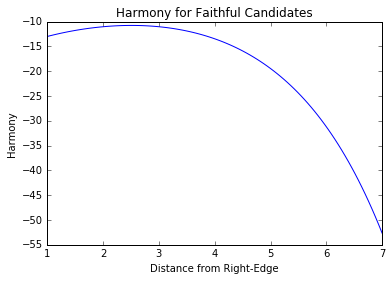

In [33]:
%matplotlib inline
import pylab
import numpy

x = numpy.linspace(1,7,100)
y = -t5_params['y']*(t5_params['a']**x) - t5_params['z']*(t5_params['b']**(8-x))
pylab.plot(x,y)
pylab.xlabel('Distance from Right-Edge')
pylab.ylabel('Harmony')
pylab.title('Harmony for Faithful Candidates')
pylab.show()

In the above graph, all candidates are assumed to be faithful. How then do we generate our windows? For instance, why does a candidate at x = 4 default to our maximum harmony position? 

This is accomplished by weighting faith to a value that is greater than the distance between the harmony for the minimum within the accepted window (x=1) and less than the harmony difference for the next closest candidate outside of the window (x=4). 

This is visualized in the graph below. 

The red line represents the harmony value for the optimal position (x=3) minus the weight of Faith. This establishes a harmony threshold above which the output remains faithful and below which the candidate is unfaithful and moves into the default window position. 

In [34]:
#x_7 = numpy.linspace(1,7,7)
#y_7 = -t5_params['y']*(t5_params['a']**x_7) - t5_params['z']*(t5_params['b']**(8-x_7))
#print("Harmonies for faithful candidates in x = 1 to x = 4")
#print(y_7[0:4])
#print()
#print("Harmony difference between optimal (x=3) and x=1")
#print(y_7[2]-y_7[0])
#print()
#print("Harmony difference between optimal (x=3) and x=4")
#print(y_7[2]-y_7[3])
#print()
#print("Weight of faith")
#print(t5_params['x'])
#print()
#print("Difference between Weight of Faith and Harmony difference x3-x1")
#print(t5_params['x'] - (y_7[2]-y_7[0]))

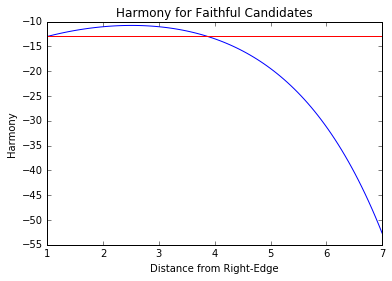

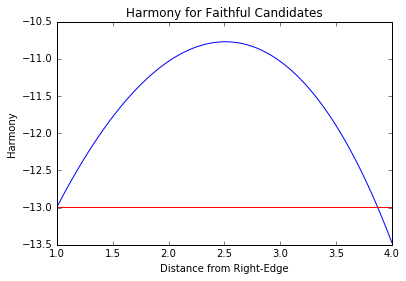

In [35]:
%matplotlib inline
import pylab
import numpy
#from scipy.optimize import fmin

## Define our harmony function and find its value at maximum harmony candidate x=3
def f(x): return -t5_params['y']*(t5_params['a']**x) - t5_params['z']*(t5_params['b']**(8-x))
#max_x = fmin(lambda x: -f(x), 0)
max_x = 3
max_y = f(max_x)

# Find faith threshold
threshold = max_y - t5_params['x']

# Plot Full
x = numpy.linspace(1,7,100)
y = -t5_params['y']*(t5_params['a']**x) - t5_params['z']*(t5_params['b']**(8-x))
pylab.plot(x,y)
pylab.axhline(threshold,color='red')
pylab.xlabel('Distance from Right-Edge')
pylab.ylabel('Harmony')
pylab.title('Harmony for Faithful Candidates')
pylab.savefig('t5_thresh_full.png')
pylab.show()

# Plot range 1-4
x = numpy.linspace(1,4,100)
y = -t5_params['y']*(t5_params['a']**x) - t5_params['z']*(t5_params['b']**(8-x))
pylab.plot(x,y)
pylab.axhline(threshold,color='red')
pylab.xlabel('Distance from Right-Edge')
pylab.ylabel('Harmony')
pylab.title('Harmony for Faithful Candidates')
pylab.savefig('t5_thresh_sub.png')
pylab.show()

# Stress in Middle of Window

Let's consider a system like above with the stress on the penultimate syllable, in the middle of the window. 

In [36]:
from scalar_product_test6 import main as test6

t6_params, t6 = test6()

for n, harmony in enumerate(t6):
    if n % 5 == 0:
        print()
        input = (n/5) + 1
        print("Input #" + str(input))
    print('Candidate ' + str(n+1) + ': ' + str(harmony))


Input #1.0
Candidate 1: -9.15826925854
Candidate 2: -38.0560683701
Candidate 3: -9.39648101396
Candidate 4: -9.84366528405
Candidate 5: -11.8765975721

Input #2.0
Candidate 6: -10.1582702585
Candidate 7: -38.0560683701
Candidate 8: -9.39648101396
Candidate 9: -9.84366528405
Candidate 10: -10.8765965721

Input #3.0
Candidate 11: -10.1582702585
Candidate 12: -38.0560683701
Candidate 13: -9.39648101396
Candidate 14: -8.84366428405
Candidate 15: -11.8765975721


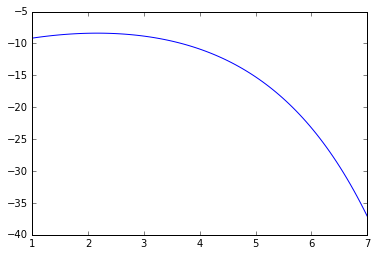

In [37]:
%matplotlib inline
import pylab
import numpy

x = numpy.linspace(1,7,100)
y = -t6_params['y']*(t6_params['a']**x) - t6_params['z']*(t6_params['b']**(8-x))
pylab.plot(x,y)
pylab.show()

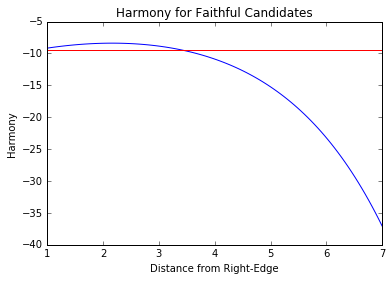

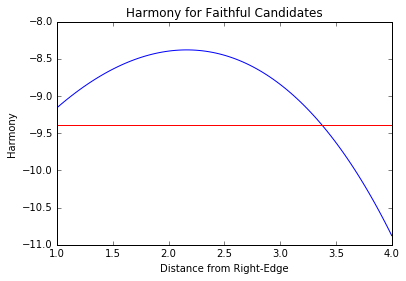

In [43]:
%matplotlib inline
import pylab
import numpy
#from scipy.optimize import fmin

## Define our harmony function and find its value at maximum harmony candidate x=2
def f(x): return -t6_params['y']*(t6_params['a']**x) - t6_params['z']*(t6_params['b']**(8-x))
#max_x = fmin(lambda x: -f(x), 0)
max_x = 2
max_y = f(max_x)

# Find faith threshold
threshold = max_y - t6_params['x']

# Plot Full
x = numpy.linspace(1,7,100)
y = -t6_params['y']*(t6_params['a']**x) - t6_params['z']*(t6_params['b']**(8-x))
pylab.plot(x,y)
pylab.axhline(threshold,color='red')
pylab.xlabel('Distance from Right-Edge')
pylab.ylabel('Harmony')
pylab.title('Harmony for Faithful Candidates')
pylab.savefig('t6_thresh_full.png')
pylab.show()

# Plot range 1-4
x = numpy.linspace(1,4,100)
y = -t6_params['y']*(t6_params['a']**x) - t6_params['z']*(t6_params['b']**(8-x))
pylab.plot(x,y)
pylab.axhline(threshold,color='red')
pylab.xlabel('Distance from Right-Edge')
pylab.ylabel('Harmony')
pylab.title('Harmony for Faithful Candidates')
pylab.savefig('t6_thresh_sub.png')
pylab.show()